In [1]:
import matplotlib.pyplot as plt
# %matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
import numpy as np
from sklearn import datasets

In [3]:
# 用于忽略警告
import warnings
warnings.filterwarnings("ignore")

In [4]:
digits = datasets.load_digits()  # 导入数据集
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [8]:
# 传入数据和标签，其实标签就是每一个数据的种类，其实也就是对应的y值
data = digits.data
label = digits.target

In [9]:
data.shape

(1797, 64)

In [10]:
n_samples,n_features = data.shape

In [11]:
print(label)

[0 1 2 ... 8 9 8]


t-SNE 降维

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,init='pca',random_state=0)
# 这个步骤其实是在设置一个模型，这个模型是一个TSNE模型，模型的名字叫tsne，
# 这个模型会先将数据用pca的方法初始化后再对数据进行降维，使用随机数的时候，随机数生成的种子是0
# 将数据降维到二维，使用主成分分析后的结果初始化，随机种子设置为0
# tsne = TSNE(n_components=2)

In [13]:
X_tsne=tsne.fit_transform(data)
X_tsne.shape

(1797, 2)

In [14]:
x_min,x_max = np.min(X_tsne,0),np.max(X_tsne,0)
# 拿到最大值和最小值,这里是0表示的是每一列的最大值或最小值。
# 其实将x_min的值打印出来后就会发现，其实它输出的是两个数

In [15]:
# 这个其实就是归一化的过程，最大-最小值归一化
X_tsne = (X_tsne-x_min)/(x_max-x_min)
X_tsne

array([[0.44763258, 0.91923255],
       [0.58546495, 0.33813626],
       [0.34016597, 0.2777207 ],
       ...,
       [0.42038602, 0.34579423],
       [0.2670439 , 0.5757654 ],
       [0.33819565, 0.37924382]], dtype=float32)

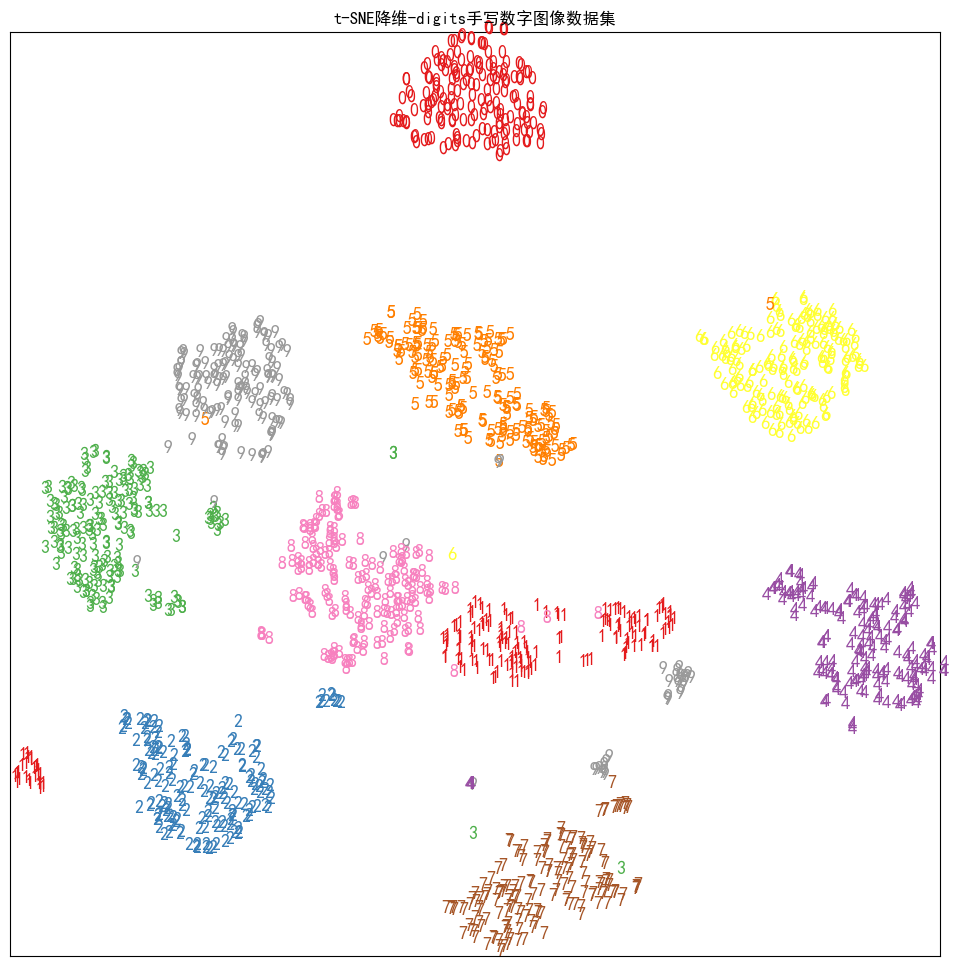

In [16]:
plt.figure(figsize=(12,12))
for i in range(data.shape[0]):
    # 这里其实就是在给画出的图像做文本标记。前两两个参数是坐标，标记的内容是对应的值，不同的值有不同的颜色
    plt.text(X_tsne[i,0],X_tsne[i,1],str(label[i]),color=plt.cm.Set1(label[i]/10.0),fontdict={'weight':'bold','size':'13'})
plt.xticks([])
plt.yticks([])
plt.title('t-SNE降维-digits手写数字图像数据集')
plt.show()

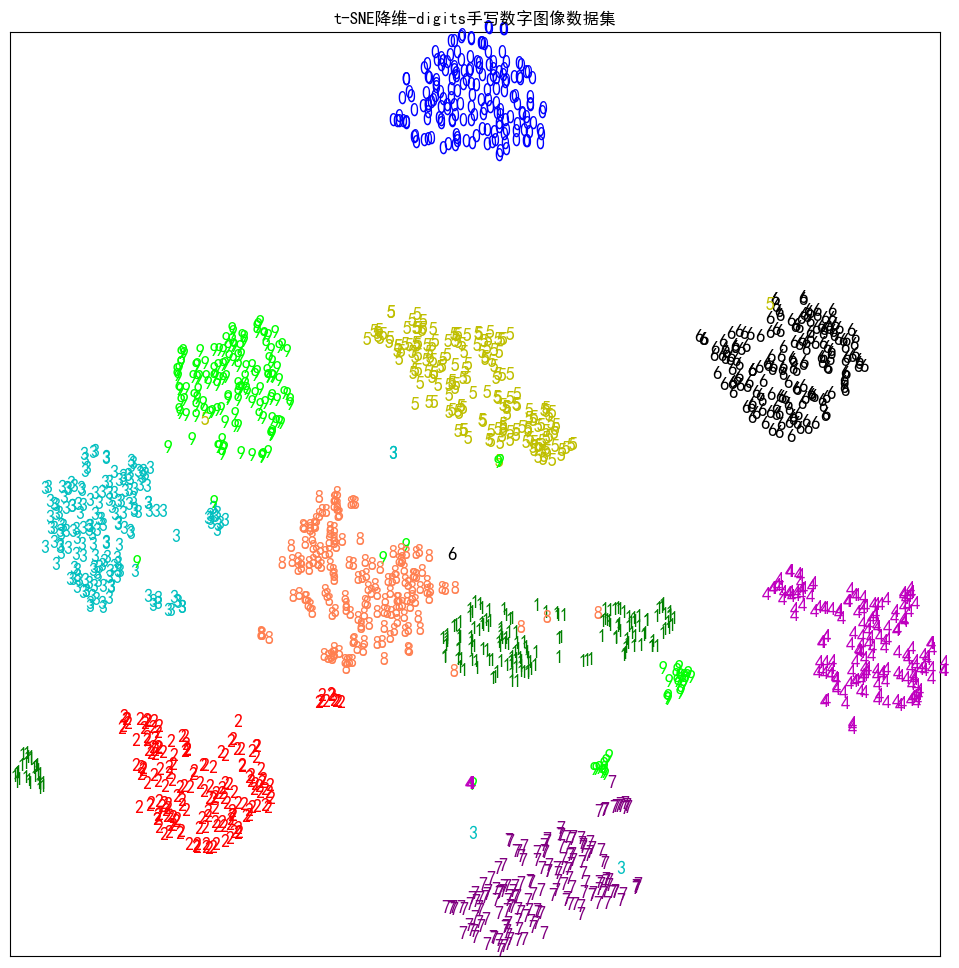

In [17]:
# 指定颜色，增大字号
plt.figure(figsize = (12,12))
colors = ['b','g','r','c','m','y','k','purple','coral','lime']
for i in range(data.shape[0]):
    plt.text(X_tsne[i,0],X_tsne[i,1],str(label[i]),color = colors[label[i]],fontdict = {'weight':'bold','size':13})
plt.xticks([])
plt.yticks([])
plt.title('t-SNE降维-digits手写数字图像数据集')
plt.show()

In [18]:
from sklearn.manifold import trustworthiness
# 降维到三维，做三维可视化
tsne3 = TSNE(n_components=3)
X_tsne3 = tsne3.fit_transform(data)

In [19]:
# 将降维后的坐标归一化
x_min_3,x_max_3 = np.min(X_tsne3,0),np.max(X_tsne3,0)
X_tsne3 = (X_tsne3-x_min_3)/(x_max_3-x_min_3)

In [20]:
X_tsne3

array([[0.46778256, 0.8951396 , 0.39357388],
       [0.68611586, 0.403262  , 0.49090996],
       [0.46699536, 0.25487143, 0.70341283],
       ...,
       [0.47338724, 0.3627989 , 0.58135074],
       [0.22998583, 0.55022126, 0.44760188],
       [0.34484094, 0.36072022, 0.5889954 ]], dtype=float32)

In [21]:
Y_train = label
Y_train

array([0, 1, 2, ..., 8, 9, 8])

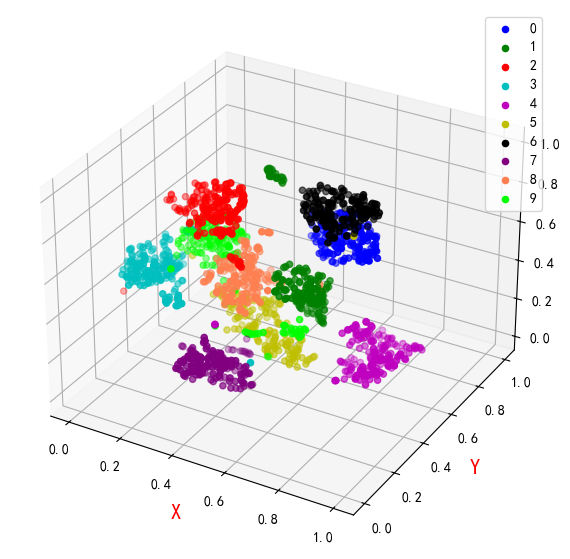

In [22]:
# TSNE降维到三维散点图可视化
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图

# 指定10种颜色
colors = ['b','g','r','c','m','y','k','purple','coral','lime']
colors_map = Y_train

nb_classes = 10

# 绘制散点图
fig = plt.figure(figsize=(10,7))
# up的代码其实在这里是出现了问题的
# ax = Axes3D(fig) 这个是up原来的代码，在有些机器上可能会导致意外的问题，但是用我这行代码就不会出错了
ax = fig.add_subplot(111, projection='3d')

# 遍历每一种数字
for cl in range(nb_classes):
    # 找到属于某种数字数据的索引号
    indices = np.where(colors_map == cl)
    # 在空间直角坐标系种绘制数据点
    ax.scatter(X_tsne3[indices[:80],0],X_tsne3[indices[:80],1],X_tsne3[indices[:80],2],c=colors[cl],label=cl)

# 添加坐标轴(顺序是 Z,Y,X)
ax.set_zlabel('Z',fontdict={'size':15,'color':'red'})
ax.set_ylabel('Y',fontdict={'size':15,'color':'red'})
ax.set_xlabel('X',fontdict={'size':15,'color':'red'})
plt.legend()
plt.show()

In [30]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 生成示例数据
x, y, z = X_tsne3[:, 0], X_tsne3[:, 1], X_tsne3[:, 2]

# 指定10种颜色
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'coral', 'lime']
colors_map = Y_train

nb_classes = 10

# 创建交互式图表
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

# 遍历每一种数字
for cl in range(nb_classes):
    # 找到属于某种数字数据的索引号
    indices = np.where(colors_map == cl)
    # 添加散点图
    scatter = go.Scatter3d(
        x=x[indices][:80],
        y=y[indices][:80],
        z=z[indices][:80],
        mode='markers',
        marker=dict(color=colors[cl], size=6),
        name=str(cl)
    )
    fig.add_trace(scatter)

# 更新布局
fig.update_layout(scene=dict(
                    xaxis_title='X',
                    yaxis_title='Y',
                    zaxis_title='Z'),
                    title='Interactive 3D Scatter Plot',
                    showlegend=True)

# 显示图表
fig.show()
